# EDA on prepped data

In [1]:
# set up path to import my python scripts
import sys
import os
src_path = os.path.abspath(os.path.join('..'))
if src_path not in sys.path:
    sys.path.append(src_path+"/src")
    
%load_ext autoreload
%autoreload 2
import prep_data as prep
import main

In [3]:
# Establish required info
# link for data files
base_url = "http://kopiko.ifa.hawaii.edu/weather/archivedata/"

# Define reasonable ranges for each column
acceptable_ranges = {
    'temperature': (-273,40),
    'humidity': (0,100),
    'wind_speed': (0,100),
    'visibility': (0,100000),
    'precipitation': (0,100),
    'dewpoint': (-273,40)
    }
# Define the thresholds for ('Green', 'Red') weather - plan to use config file in future
thresholds = {
        'humidity': (75,85),
        'wind_sust': (10,12),
        'wind_gust': (15,15),
        'visibility': (50000,40000),
        'precipitation': (0,0),
        'dewpoint_delta': (6,3)
        }

In [9]:
# Run from jupyter
data_path_for_notebook = '../data/'
# get list of all data file urls
csv_urls = prep.get_csv_file_links(base_url)

# prep all data 
for url in csv_urls:
    year = url.split('/')[-1].split('.')[0]
    # for now skip 2020-2021 becuase I know the formating is not correct. Skip 1993 because it is empty.
    if year in ['1993','2020','2021']:
        continue
    # if prepped data file already exist for that year skip it
    elif main.prepped_data_exists(year,base_path=data_path_for_notebook):
        continue
    else:
        main.get_and_prep_data(url,acceptable_ranges,thresholds,save_results=True,save_path=data_path_for_notebook)

In [16]:
# combine the daily status hours for all years into one df
df = prep.combine_status_hour_dfs(base_path=data_path_for_notebook)
df = prep.normalize_daily_hours_to_24(df)
prep.add_month_year_columns(df)

In [17]:
df

,Green,Yellow,Red,month,year
date,,,,,
1994-09-11,21.600000,NaN,2.400000,Sep,1994
1994-09-12,23.000000,NaN,1.000000,Sep,1994
1994-09-13,22.500000,NaN,1.500000,Sep,1994
1994-09-14,24.000000,NaN,NaN,Sep,1994
1994-09-15,23.741935,NaN,0.258065,Sep,1994
...,...,...,...,...,...
2019-12-27,0.597499,0.054318,23.348183,Dec,2019
2019-12-28,4.137437,3.982820,15.879742,Dec,2019
2019-12-29,3.484241,5.154728,15.361032,Dec,2019


In [18]:

df.describe()

,Green,Yellow,Red,year
count,8403.000000,7340.000000,7248.000000,8965.000000
mean,13.724806,3.469389,10.260091,2006.789069
std,8.486633,2.822678,8.548573,7.277076
min,0.002786,0.002373,0.003017,1994.000000
25%,5.123872,1.430320,1.833333,2000.000000
50%,15.666667,2.861555,8.204558,2007.000000
75%,21.333333,4.660423,18.847470,2013.000000
max,24.000000,24.000000,24.000000,2019.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8965 entries, 1994-09-11 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Green   8403 non-null   float64 
 1   Yellow  7340 non-null   float64 
 2   Red     7248 non-null   float64 
 3   month   8965 non-null   category
 4   year    8965 non-null   int64   
dtypes: category(1), float64(3), int64(1)
memory usage: 359.3 KB


<br>

-------------------------------------


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size':16})

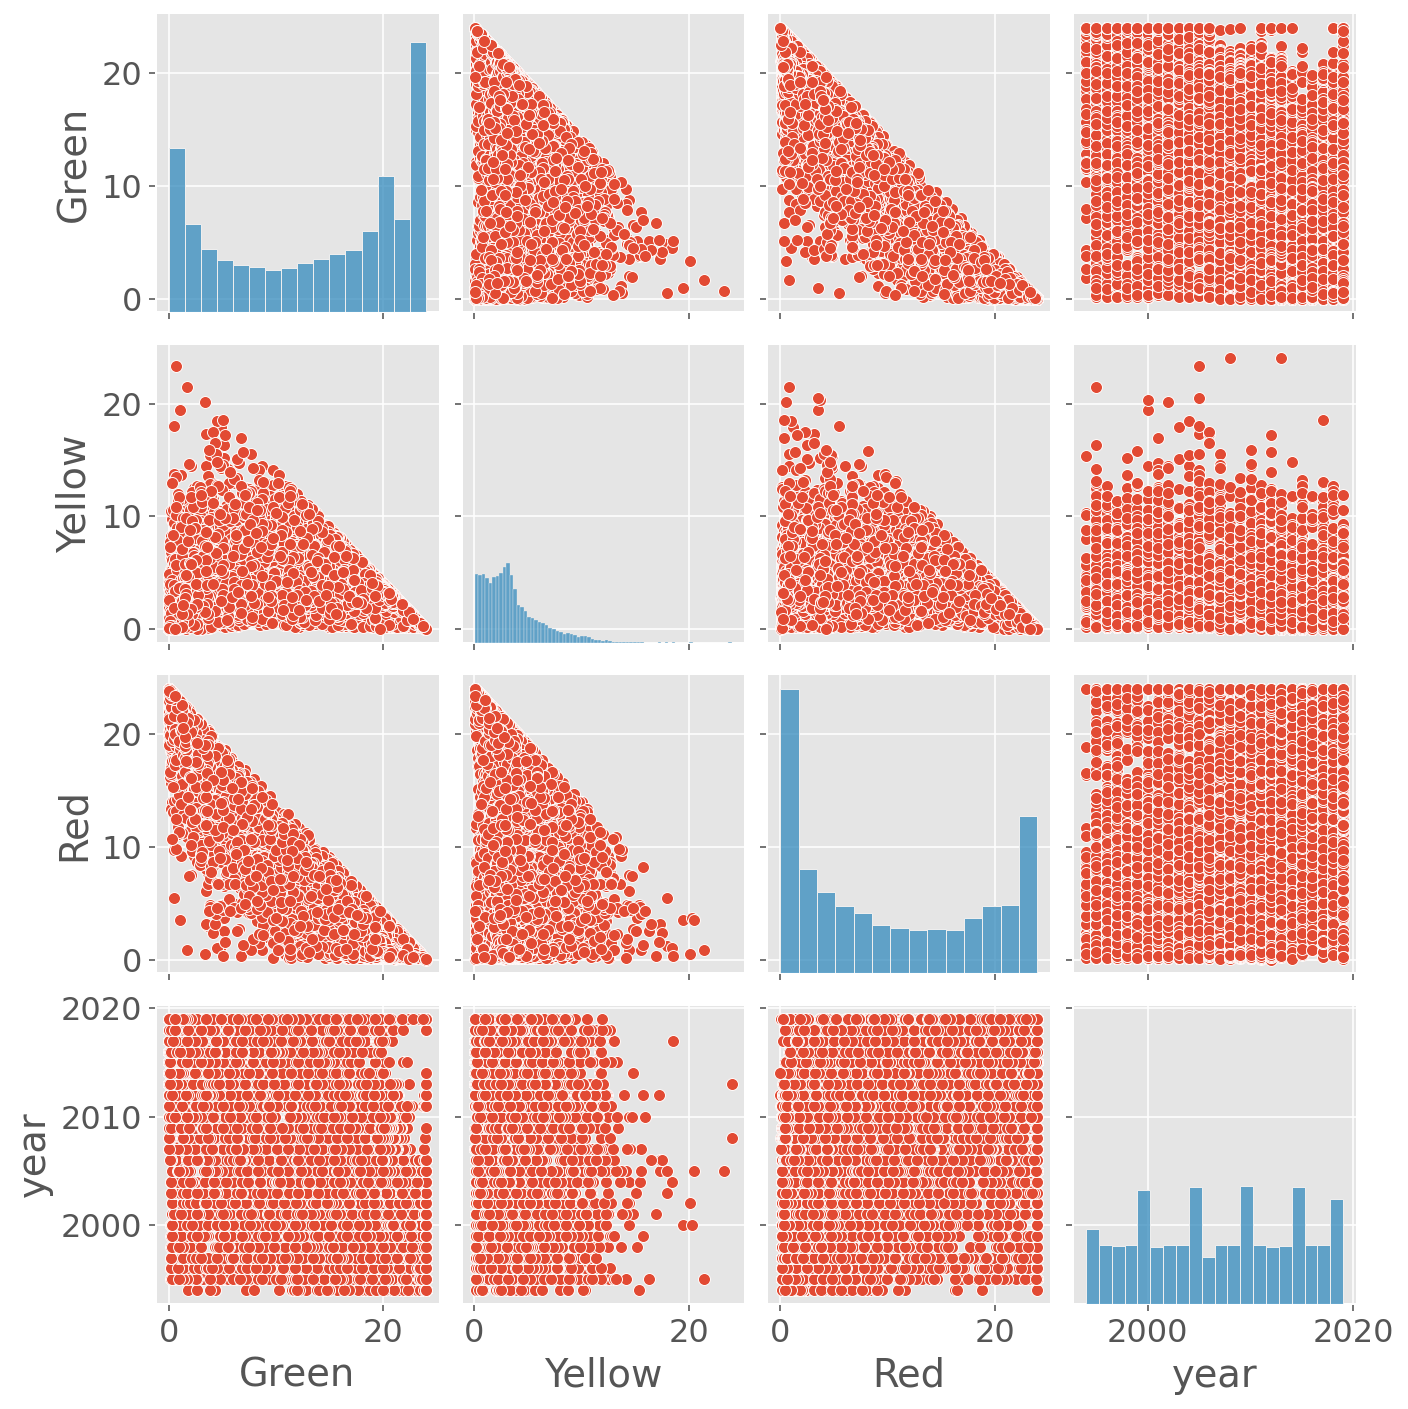

In [21]:
sns.pairplot(df)

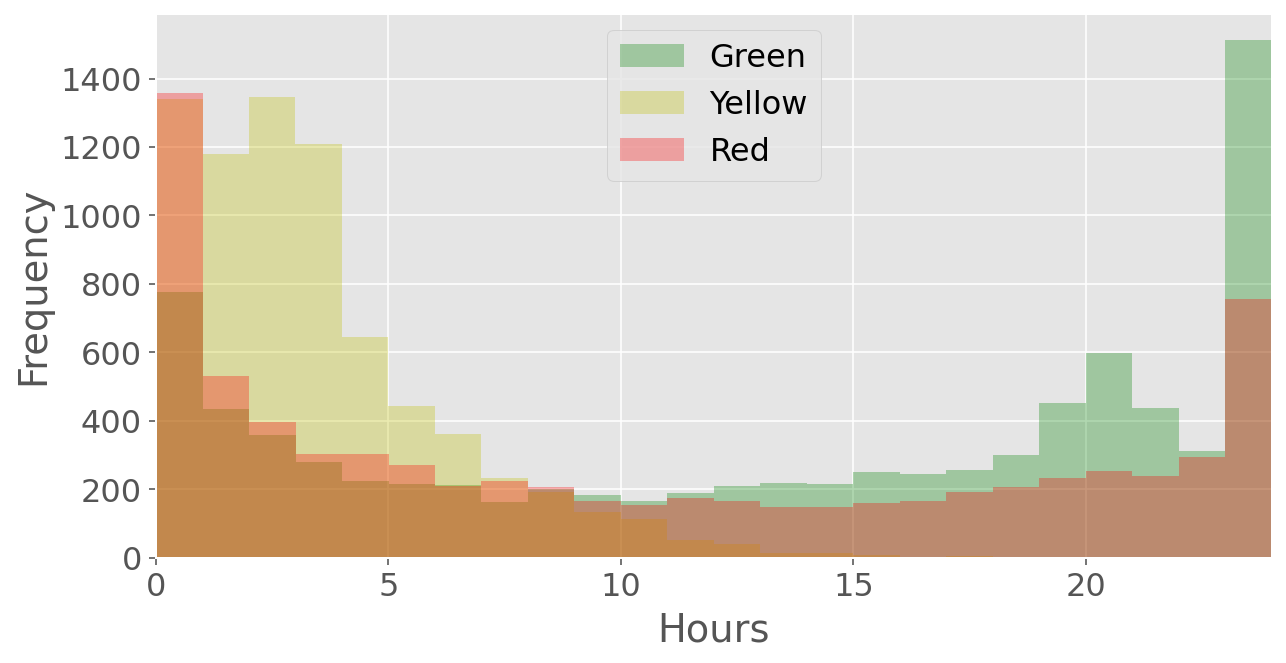

In [37]:
fig,ax = plt.subplots(figsize=(10,5))
df.Green.hist(bins=24,ax=ax,alpha=0.3,color='g',label='Green')
df.Yellow.hist(bins=24,ax=ax,alpha=0.3,color='y',label='Yellow')
df.Red.hist(bins=24,ax=ax,alpha=0.3,color='r',label='Red')
ax.set_xlim(0,24)
ax.set_xlabel('Hours')
ax.set_ylabel('Frequency')
ax.legend();